In [1]:
import matplotlib.pyplot as plt
import mplhep
# plt.style.use(mplhep.style.ATLAS)  # ATLAS/CMS/ALICE plot style
import numpy as np
import pandas as pd
import scipy.optimize as sc

In [10]:
# energy calibration
# get filepath of all calibration data
energy_path = 'Stationary_Scintillator/'

Na_file1 = energy_path + 'Na_22_Calibration_Spectrum.TKA'
df_Na1 = pd.read_csv(Na_file1, header=None)
N_Na1 = np.array(df_Na1[0][2:])
t_Na1 = df_Na1[0][0]  # live time [s]

Na_file2 = energy_path + 'Na_22_Calibration_Spectrum_2.TKA'
df_Na2 = pd.read_csv(Na_file2, header=None)
N_Na2 = np.array(df_Na2[0][2:])
t_Na2 = df_Na2[0][0]  # live time [s]

Na_file3 = energy_path + 'Na_22_Calibration_Spectrum_3.TKA'
df_Na3 = pd.read_csv(Na_file3, header=None)
N_Na3 = np.array(df_Na3[0][2:])
t_Na3 = df_Na3[0][0]  # live time [s]

Na_file4 = energy_path + 'Na_22_Calibration_Spectrum_4.TKA'
df_Na4 = pd.read_csv(Na_file4, header=None)
N_Na4 = np.array(df_Na4[0][2:])
t_Na4 = df_Na4[0][0]  # live time [s]


Co_file1 = energy_path + 'Co_60_Calibration_Spectrum.TKA'
df_Co1 = pd.read_csv(Co_file1, header=None)
N_Co1 = np.array(df_Co1[0][2:])
t_Co1 = df_Co1[0][0]  # live time [s]

Co_file2 = energy_path + 'Co_60_Calibration_Spectrum_2.TKA'
df_Co2 = pd.read_csv(Co_file2, header=None)
N_Co2 = np.array(df_Co2[0][2:])
t_Co2 = df_Co2[0][0]  # live time [s]

Co_file3 = energy_path + 'Co_60_Calibration_Spectrum_3.TKA'
df_Co3 = pd.read_csv(Co_file3, header=None)
N_Co3 = np.array(df_Co3[0][2:])
t_Co3 = df_Co3[0][0]  # live time [s]

Co_file4 = energy_path + 'Co_60_Calibration_Spectrum_4.TKA'
df_Co4 = pd.read_csv(Co_file4, header=None)
N_Co4 = np.array(df_Co4[0][2:])
t_Co4 = df_Co4[0][0]  # live time [s]

Pd_file = energy_path + 'Pd_106_Spectrum_2.TKA'
df_Pd = pd.read_csv(Pd_file, header=None)
N_Pd = np.array(df_Pd[0][2:])
t_Pd = df_Pd[0][0]  # live time [s]

under_file = energy_path + 'underground.TKA'
df_under = pd.read_csv(under_file, header=None)
N_under = np.array(df_under[0][2:])
t_under = df_under[0][0]  # live time [s]

In [11]:
def counting_rate(N, t):
    '''Calculate counting rate and uncertainty'''
    n = N / t
    u_n = np.sqrt(N) / t
    return n, u_n


def corrected_rate(N, t):
    '''Calculate counting rate corrected for underground with uncertainty'''
    n_raw, u_raw = counting_rate(N, t)
    n_under, u_under = counting_rate(N_under, t_under)

    n_corr = n_raw - n_under
    n_corr = np.where(n_corr>0, n_corr, 0)
    u_corr = np.sqrt(u_raw**2 + u_under**2)

    return n_corr, u_corr

In [12]:
n_Na1, u_Na1 = corrected_rate(N_Na1, t_Na1)
n_Na2, u_Na2 = corrected_rate(N_Na2, t_Na2)
n_Na3, u_Na3 = corrected_rate(N_Na3, t_Na3)
n_Na4, u_Na4 = corrected_rate(N_Na4, t_Na4)

n_Na = [n_Na1, n_Na2, n_Na3, n_Na4]
u_Na = [u_Na1, u_Na2, u_Na3, u_Na4]

n_Co1, u_Co1 = corrected_rate(N_Co1, t_Co1)
n_Co2, u_Co2 = corrected_rate(N_Co2, t_Co2)
n_Co3, u_Co3 = corrected_rate(N_Co3, t_Co3)
n_Co4, u_Co4 = corrected_rate(N_Co4, t_Co4)

n_Co = [n_Co1, n_Co2, n_Co3, n_Co4]
u_Co = [u_Co1, u_Co2, u_Co3, u_Co4]

n_Pd, u_Pd = corrected_rate(N_Pd, t_Pd)

n_under, u_under = counting_rate(N_under, t_under)

In [13]:
def gauss(x, A, mu, sigma, B):
    return A * np.exp(-(x-mu)**2 / (2*sigma**2)) + B

def linear_fct(x, m, c):
    return m * x + c

[2.01324970e+00 3.42571832e+03 1.28830778e+02 9.80954067e-02] [0.00305073 0.16818122 0.17922977 0.00077043]
[2.50535467e-01 8.13413665e+03 2.16309757e+02 1.34516142e-02] [9.91599204e-04 6.69829494e-01 1.21519074e+00 8.34125610e-04]
[2.10798981e+00 3.42308750e+03 1.28140761e+02 7.80208457e-02] [0.00205464 0.10722974 0.11395789 0.00055174]
[2.62285380e-01 8.12555695e+03 2.11336354e+02 1.38440996e-02] [6.38103954e-04 4.23043557e-01 7.00773013e-01 4.76602731e-04]
[2.51537687e+00 2.59022684e+03 1.05778690e+02 1.34101432e-01] [0.00340843 0.12449186 0.12630399 0.00075201]
[2.87876991e-01 6.34382467e+03 1.86190309e+02 2.13817277e-02] [0.00310474 0.56505517 2.38049712 0.00348445]
[3.14012557e+00 2.19091691e+03 8.86168498e+01 1.10309929e-01] [0.00910806 0.22501343 0.24900453 0.00284019]
[3.43768555e-01 5.60900461e+03 1.60234894e+02 2.10587888e-02] [0.00314124 0.99708373 2.12701744 0.00309481]


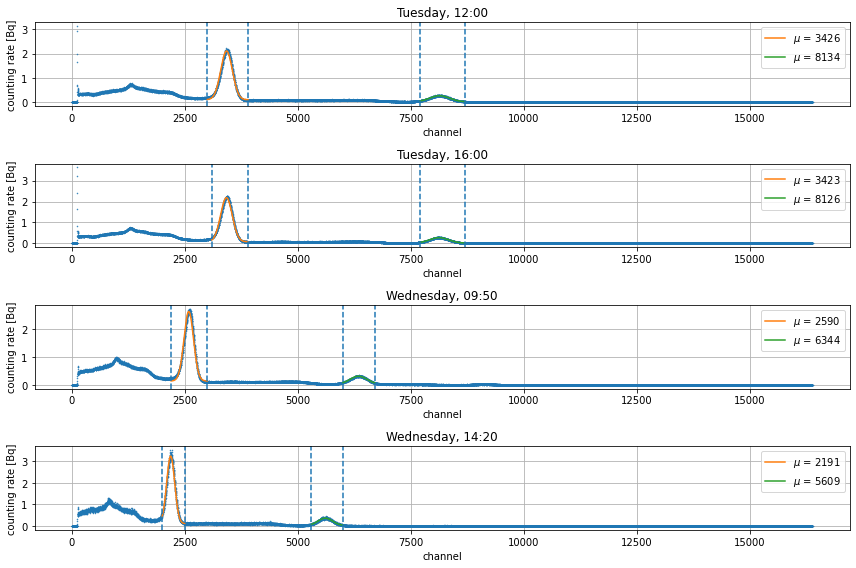

In [32]:
# Analysis of the sodium spectrum

channels = np.arange(1, len(N_Na1)+1, 1)

a = [[3000, 3900], [3100, 3900], [2200, 3000], [2000, 2500]]
b = [[7700, 8700], [7700, 8700], [6000, 6700], [5300, 6000]]

fig, ax = plt.subplots(4, figsize=(12,8))
coeffs_Na = np.zeros((8, 4))
cov_Na = np.zeros((8, 4, 4))

error_step = 100

for i in range(4):
    coeffs_Na[2*i], cov_Na[2*i] = sc.curve_fit(gauss, channels[a[i][0]:a[i][1]], n_Na[i][a[i][0]:a[i][1]],
                                   sigma = u_Na[i][a[i][0]:a[i][1]], absolute_sigma=True,
                                   p0=(2, 0.5*(a[i][0]+a[i][1]), 120, 150))
    coeffs_Na[2*i+1], cov_Na[2*i+1] = sc.curve_fit(gauss, channels[b[i][0]:b[i][1]], n_Na[i][b[i][0]:b[i][1]],
                                   sigma = u_Na[i][b[i][0]:b[i][1]], absolute_sigma=True,
                                   p0=(2, 0.5*(b[i][0]+b[i][1]), 120, 150))


    print(coeffs_Na[2*i], np.sqrt(np.diagonal(cov_Na[2*i])))
    print(coeffs_Na[2*i+1], np.sqrt(np.diagonal(cov_Na[2*i+1])))
    # ax[i].errorbar(channels[0:-1:error_step], n_Na1[0:-1:error_step],
    #             yerr=u_Na1[0:-1:error_step],
    #             fmt='none', c='black', zorder=10)

    ax[i].plot(channels, n_Na[i], lw=0, marker = '.', ms = 1)
    ax[i].plot(channels[a[i][0]:a[i][1]], gauss(channels[a[i][0]:a[i][1]], *coeffs_Na[2*i]),
               label = r'$\mu$ = {:.0f}'.format(coeffs_Na[2*i][1]))
    ax[i].plot(channels[b[i][0]:b[i][1]], gauss(channels[b[i][0]:b[i][1]], *coeffs_Na[2*i+1]),
              label = r'$\mu$ = {:.0f}'.format(coeffs_Na[2*i+1][1]))
    ax[i].axvline(channels[a[i][0]], ls = '--')
    ax[i].axvline(channels[a[i][1]], ls = '--')
    ax[i].axvline(channels[b[i][0]], ls = '--')
    ax[i].axvline(channels[b[i][1]], ls = '--')

    ax[i].set_xlabel('channel')
    ax[i].set_ylabel('counting rate [Bq]')

    ax[i].legend()
    ax[i].grid()

ax[0].set_title('Tuesday, 12:00')
ax[1].set_title('Tuesday, 16:00')
ax[2].set_title('Wednesday, 09:50')
ax[3].set_title('Wednesday, 14:20')
plt.tight_layout()
plt.show()

[9.45203441e-02 7.65710352e+03 1.95017605e+02 2.22911942e-02] [6.79348300e-04 8.38136683e-01 2.08510036e+00 7.26440812e-04]
[8.53711627e-02 8.66856668e+03 2.27691403e+02 3.05121004e-03] [1.37230929e-03 1.03017196e+00 3.97960718e+00 1.50950546e-03]
[1.00787957e-01 7.49080338e+03 2.14354210e+02 2.23385509e-02] [9.66618117e-04 5.42682495e-01 2.33860736e+00 1.07428338e-03]
[8.58388859e-02 8.47647510e+03 2.34922691e+02 7.39428377e-03] [1.07604944e-03 5.93716402e-01 3.02699020e+00 1.17712669e-03]
[1.37626570e-01 5.82449364e+03 1.69342335e+02 1.94518832e-02] [1.77060963e-03 1.03000524e+00 2.96449436e+00 1.95837261e-03]
[1.18194432e-01 6.64112703e+03 1.84646703e+02 1.40814897e-03] [5.51928010e-03 1.36967454e+00 7.85593204e+00 5.90233596e-03]
[1.37722238e-01 4.86529117e+03 1.71783657e+02 1.91641281e-02] [3.73183346e-03 1.32777526e+00 5.15307627e+00 4.11051461e-03]
[1.01388807e-01 5.61124688e+03 1.72765597e+02 1.55818440e-02] [6.92804831e-03 1.89718577e+00 1.05558905e+01 7.37212920e-03]


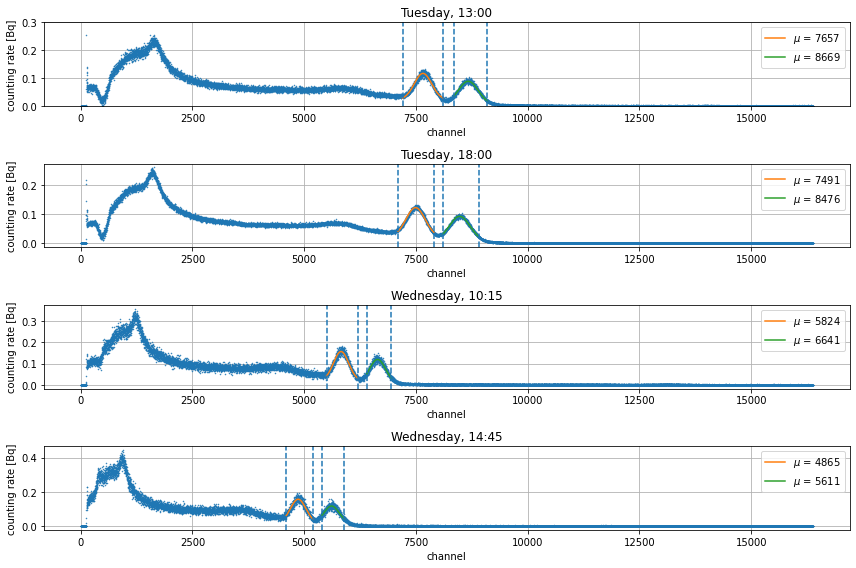

In [51]:
# Analysis of the cobalt spectrum

channels = np.arange(1, len(N_Co1)+1, 1)

a = [[7200, 8100], [7100, 7900], [5500, 6200], [4600, 5200]]
b = [[8350, 9100], [8100, 8900], [6400, 6950], [5400, 5900]]

fig, ax = plt.subplots(4,1, figsize=(12,8))
coeffs_Co = np.zeros((8, 4))
cov_Co = np.zeros((8, 4, 4))

error_step = 100

for i in range(4):
    coeffs_Co[2*i], cov_Co[2*i] = sc.curve_fit(gauss, channels[a[i][0]:a[i][1]], n_Co[i][a[i][0]:a[i][1]],
                                   sigma = u_Co[i][a[i][0]:a[i][1]], absolute_sigma=True,
                                   p0=(2, 0.5*(a[i][0]+a[i][1]), 120, 150))
    coeffs_Co[2*i+1], cov_Co[2*i+1] = sc.curve_fit(gauss, channels[b[i][0]:b[i][1]], n_Co[i][b[i][0]:b[i][1]],
                                   sigma = u_Co[i][b[i][0]:b[i][1]], absolute_sigma=True,
                                   p0=(2, 0.5*(b[i][0]+b[i][1]), 120, 150))


    print(coeffs_Co[2*i], np.sqrt(np.diagonal(cov_Co[2*i])))
    print(coeffs_Co[2*i+1], np.sqrt(np.diagonal(cov_Co[2*i+1])))
    # ax[i].errorbar(channels[0:-1:error_step], n_Co1[0:-1:error_step],
    #             yerr=u_Co1[0:-1:error_step],
    #             fmt='none', c='black', zorder=10)

    ax[i].plot(channels, n_Co[i], lw=0, marker = '.', ms = 1)
    ax[i].plot(channels[a[i][0]:a[i][1]], gauss(channels[a[i][0]:a[i][1]], *coeffs_Co[2*i]),
               label = r'$\mu$ = {:.0f}'.format(coeffs_Co[2*i][1]))
    ax[i].plot(channels[b[i][0]:b[i][1]], gauss(channels[b[i][0]:b[i][1]], *coeffs_Co[2*i+1]),
              label = r'$\mu$ = {:.0f}'.format(coeffs_Co[2*i+1][1]))
    ax[i].axvline(channels[a[i][0]], ls = '--')
    ax[i].axvline(channels[a[i][1]], ls = '--')
    ax[i].axvline(channels[b[i][0]], ls = '--')
    ax[i].axvline(channels[b[i][1]], ls = '--')

    ax[i].set_xlabel('channel')
    ax[i].set_ylabel('counting rate [Bq]')

    ax[i].legend()
    ax[i].grid()

ax[0].set_ylim(0,0.3)
ax[0].set_title('Tuesday, 13:00')
ax[1].set_title('Tuesday, 18:00')
ax[2].set_title('Wednesday, 10:15')
ax[3].set_title('Wednesday, 14:45')
plt.tight_layout()
plt.show()

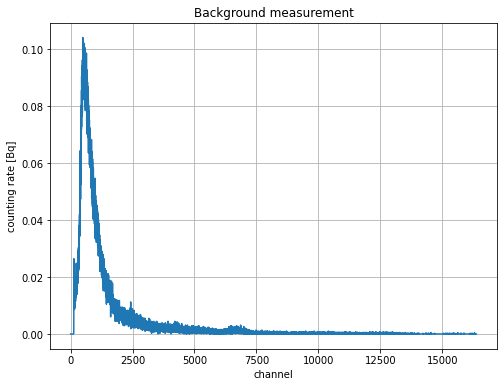

In [52]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(channels, n_under)
ax.grid()
ax.set_title('Background measurement')
ax.set_xlabel('channel')
ax.set_ylabel('counting rate [Bq]')
plt.show()

In [60]:
energies = np.array([511, 1274.6, 1173.2, 1332.5])
ch_num1 = np.array([coeffs_Na[0,1], coeffs_Na[1,1], coeffs_Co[0,1], coeffs_Co[1,1]])
ch_num2 = np.array([coeffs_Na[2,1], coeffs_Na[3,1], coeffs_Co[2,1], coeffs_Co[3,1]])
ch_num3 = np.array([coeffs_Na[4,1], coeffs_Na[5,1], coeffs_Co[4,1], coeffs_Co[5,1]])
ch_num4 = np.array([coeffs_Na[6,1], coeffs_Na[7,1], coeffs_Co[6,1], coeffs_Co[7,1]])
ch_num = np.array([ch_num1, ch_num2, ch_num3, ch_num4])

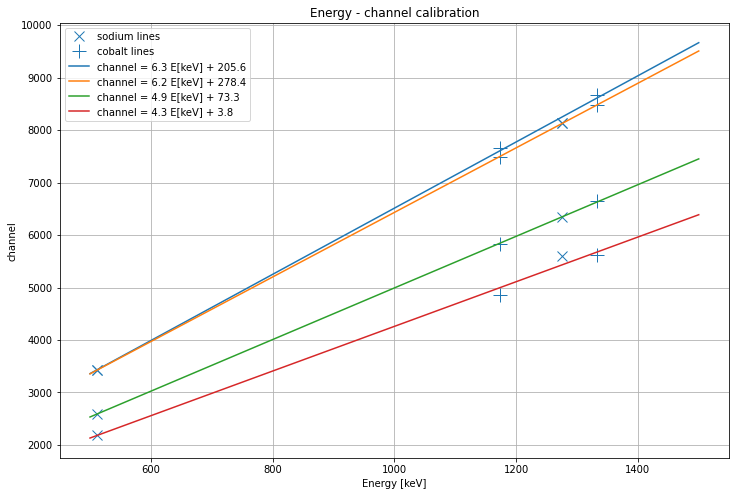

In [63]:
coeffs_lin = np.zeros((4, 2))
cov_lin = np.zeros((4,2,2))

e_axis = np.linspace(500, 1500, 1001)
fig, ax = plt.subplots(figsize=(12,8))

for i in range(4):
    coeffs_lin[i], cov_lin[i] = sc.curve_fit(linear_fct, energies, ch_num[i])

    if i==0:
        ax.plot(energies[:2], ch_num[i, :2], marker = 'x', ms=10, lw = 0, label = 'sodium lines', c='C0')
        ax.plot(energies[2:], ch_num[i, 2:], marker = '+', ms=14, lw = 0, label = 'cobalt lines', c='C0')
    else:
        ax.plot(energies[:2], ch_num[i, :2], marker = 'x', ms=10, lw = 0, c='C0')
        ax.plot(energies[2:], ch_num[i, 2:], marker = '+', ms=14, lw = 0, c='C0')

    ax.plot(e_axis, linear_fct(e_axis, *coeffs_lin[i]), label= r'channel = {:.1f} E[keV] + {:.1f}'.format(*coeffs_lin[i]))

ax.set_title('Energy - channel calibration')
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('channel')
ax.legend()
ax.grid()
plt.show()

In [70]:
def energy(channel):
    m, c = coeffs_lin[0]
    return (channel - c) / m


def u_energy(channel, u_channel=1):
    m, c = coeffs_lin[0]
    u_m, u_c = np.sqrt(np.diagonal(cov_lin))
    return np.sqrt((u_channel/m)**2 + (u_c/m)**2 + (u_m*(channel-c)/m**2)**2)

[5.26163591e-02 2.65060613e+03 1.56623895e+02 2.53096274e-02]


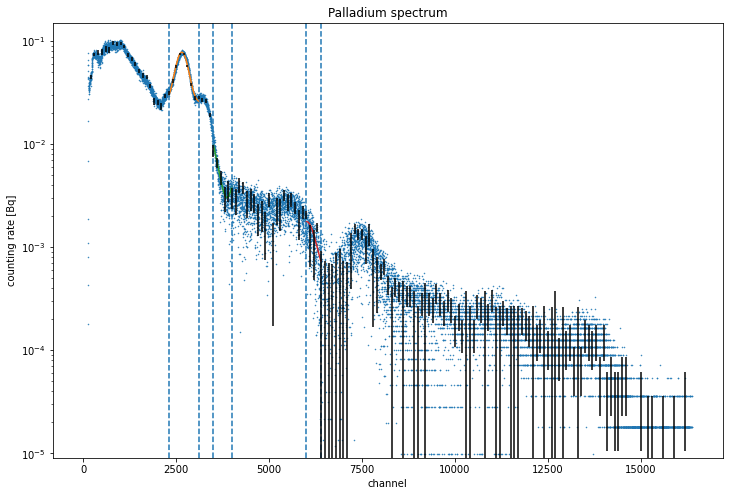

[5.26163591e-02 2.65060613e+03 1.56623895e+02 2.53096274e-02] [1.58620162e-04 3.72529016e-01 6.78345442e-01 1.47012706e-04]
[  -71.14444162  3867.46582359 26457.62411067    71.1474666 ] [5.71528258e+03 4.78459005e+00 1.06297018e+06 5.71528258e+03]
[1.22361623e-03 6.01350857e+03 1.98329961e+02 5.43320786e-04] [2.95537962e-04 4.54087423e+01 6.53625626e+01 2.68611270e-04]
387.7001943068809
580.651859034534
920.9396701231676


In [71]:
# Analysis of the Palladium spectrum
channels = np.arange(1, len(N_Pd)+1, 1)
a1, b1 = 2300, 3100
a2, b2 = 3500, 4000
a3, b3 = 6000, 6400

coeffs_Pd1, cov_Pd1 = sc.curve_fit(gauss, channels[a1:b1], n_Pd[a1:b1],
                                   sigma=u_Pd[a1:b1], absolute_sigma=True,
                                   p0=(0.2, 0.5*(a1+b1), 200, 15))
coeffs_Pd2, cov_Pd2 = sc.curve_fit(gauss, channels[a2:b2], n_Pd[a2:b2],
                                   sigma=u_Pd[a2:b2], absolute_sigma=True,
                                   p0=(0.2, 0.5*(a2+b2), 200, 20))
coeffs_Pd3, cov_Pd3 = sc.curve_fit(gauss, channels[a3:b3], n_Pd[a3:b3],
                                   sigma=u_Pd[a3:b3], absolute_sigma=False,
                                   p0=(0.002, 0.5*(a3+b3), 200, 0.001))

fig, ax = plt.subplots(figsize=(12,8))
print(coeffs_Pd1)

error_step = 100
ax.errorbar(channels[0:-1:error_step], n_Pd[0:-1:error_step],
            yerr=u_Pd[0:-1:error_step],
            fmt='none', c='black', zorder=10)

ax.plot(channels, n_Pd, lw=0, marker = '.', ms = 1)
ax.plot(channels[a1:b1], gauss(channels[a1:b1], *coeffs_Pd1))
ax.plot(channels[a2:b2], gauss(channels[a2:b2], *coeffs_Pd2))
ax.plot(channels[a3:b3], gauss(channels[a3:b3], *coeffs_Pd3))
ax.axvline(channels[a1], ls = '--')
ax.axvline(channels[b1], ls = '--')
ax.axvline(channels[a2], ls = '--')
ax.axvline(channels[b2], ls = '--')
ax.axvline(channels[a3], ls = '--')
ax.axvline(channels[b3], ls = '--')

ax.set_ylim((.5/t_Pd, 0.15))
ax.set_yscale('log')

ax.set_title('Palladium spectrum')
ax.set_xlabel('channel')
ax.set_ylabel('counting rate [Bq]')

plt.show()
print(coeffs_Pd1, np.sqrt(np.diagonal(cov_Pd1)))
print(coeffs_Pd2, np.sqrt(np.diagonal(cov_Pd2)))
print(coeffs_Pd3, np.sqrt(np.diagonal(cov_Pd3)))

print(energy(coeffs_Pd1[1]))
print(energy(coeffs_Pd2[1]))
print(energy(coeffs_Pd3[1]))

In [84]:
print(energy(coeffs_Pd1[1]), '+-', u_energy(coeffs_Pd1[1]), 'keV')
print(energy(coeffs_Pd2[1]), '+-', u_energy(coeffs_Pd2[1]), 'keV')
print(energy(coeffs_Pd3[1]), '+-', u_energy(coeffs_Pd3[1]), 'keV')

510.8517855683995 +- 4.891426506594109 keV
622.6879043501848 +- 5.091018734044272 keV
1054.1290357234318 +- 6.106446896956429 keV


In [13]:
### Source for Pd Term sceme:
# Abb.2.11 on p. 38
# http://iktp.tu-dresden.de/IKTP/pub/09/Marcel_Heine_-_Eine_Suche_nach_Doppelbeta-Zerfaellen_von_Cadmium-_%20Zink_und%20Tellur-_Isotopen_mit_Positronen-Emission.pdf

# both lines identified! Nice!!